In [1]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing 
import pandas as pd 
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import month_plot
from statsmodels.graphics.tsaplots import plot_acf   #Auto Correlation PLOT
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [2]:
df=pd.read_csv('C:\\Users\\Admin\\OneDrive\\Desktop\\DESKTOP_FILES\\Internship\\data.csv',index_col=0,parse_dates=True)
print(df.head())

                 revenue
Month with Year         
2018-01-01          1458
2018-02-01          1102
2018-03-01          1584
2018-04-01          1676
2018-05-01          1461


<Axes: xlabel='Month with Year'>

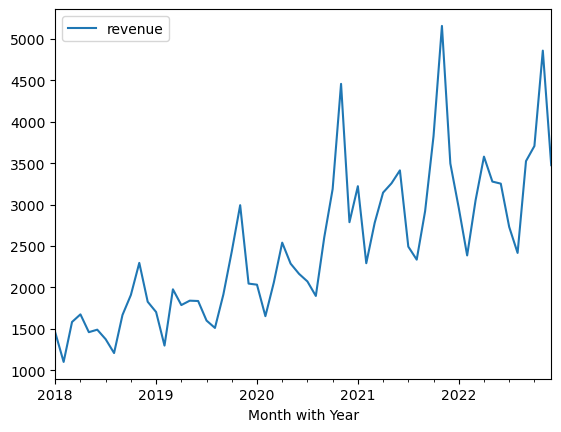

In [3]:
df.plot()

In [4]:
df=df.asfreq("MS")

In [5]:
df.head()

,revenue
Month with Year,
2018-01-01,1458
2018-02-01,1102
2018-03-01,1584
2018-04-01,1676
2018-05-01,1461


In [6]:
df

,revenue
Month with Year,
2018-01-01,1458
2018-02-01,1102
2018-03-01,1584
2018-04-01,1676
2018-05-01,1461
2018-06-01,1491
2018-07-01,1376
2018-08-01,1209
2018-09-01,1668


In [7]:
df.index

DatetimeIndex(['2018-01-01', '2018-02-01', '2018-03-01', '2018-04-01',
               '2018-05-01', '2018-06-01', '2018-07-01', '2018-08-01',
               '2018-09-01', '2018-10-01', '2018-11-01', '2018-12-01',
               '2019-01-01', '2019-02-01', '2019-03-01', '2019-04-01',
               '2019-05-01', '2019-06-01', '2019-07-01', '2019-08-01',
               '2019-09-01', '2019-10-01', '2019-11-01', '2019-12-01',
               '2020-01-01', '2020-02-01', '2020-03-01', '2020-04-01',
               '2020-05-01', '2020-06-01', '2020-07-01', '2020-08-01',
               '2020-09-01', '2020-10-01', '2020-11-01', '2020-12-01',
               '2021-01-01', '2021-02-01', '2021-03-01', '2021-04-01',
               '2021-05-01', '2021-06-01', '2021-07-01', '2021-08-01',
               '2021-09-01', '2021-10-01', '2021-11-01', '2021-12-01',
               '2022-01-01', '2022-02-01', '2022-03-01', '2022-04-01',
               '2022-05-01', '2022-06-01', '2022-07-01', '2022-08-01',
      

In [8]:
decompose=seasonal_decompose(x=df['revenue'],model='additive',period=12)

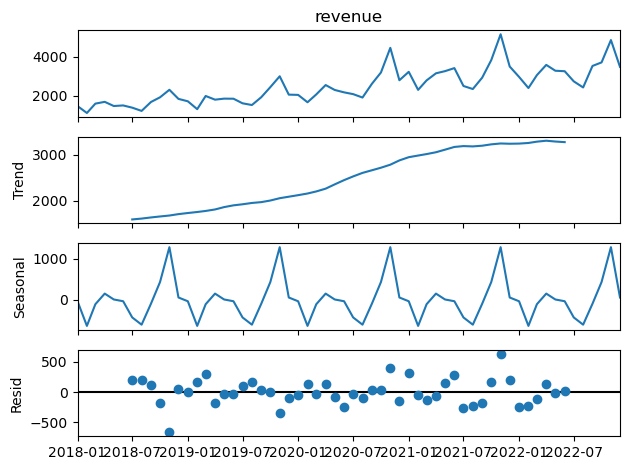

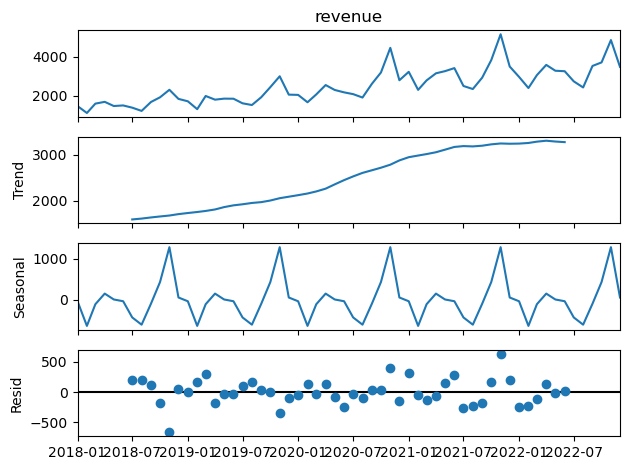

In [9]:
decompose.plot()

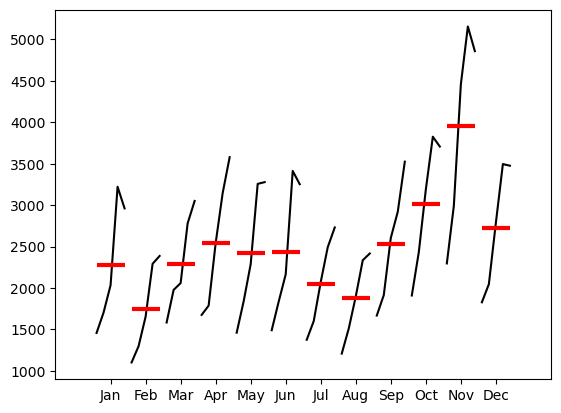

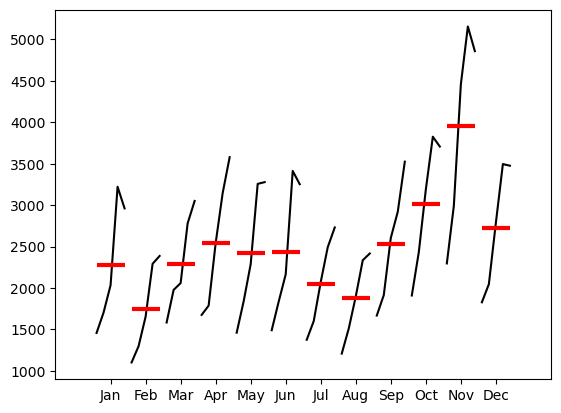

In [10]:
month_plot(df.revenue)

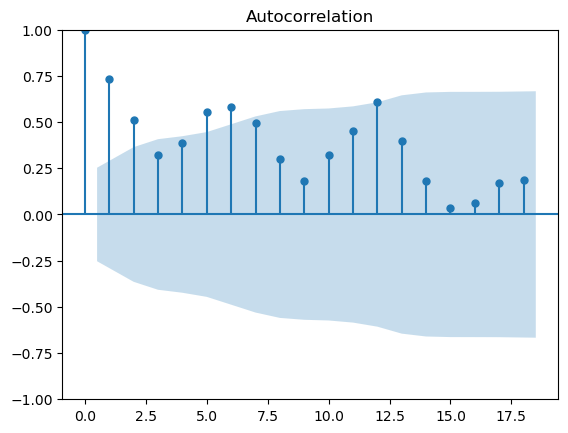

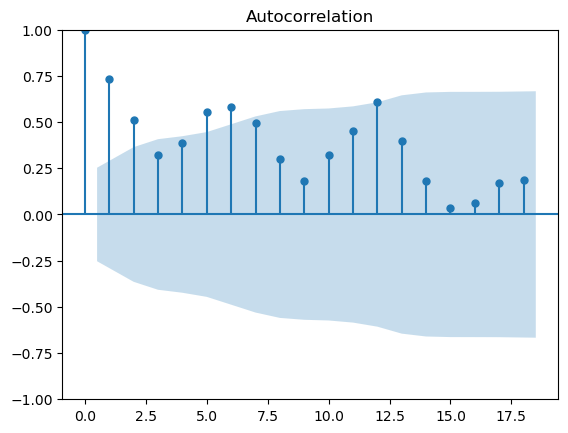

In [11]:
plot_acf(df.revenue)

In [40]:
#Splitting data into training and testing
print(df.describe())

           revenue
count    60.000000
mean   2488.666667
std     902.617280
min    1102.000000
25%    1818.000000
50%    2316.500000
75%    3155.750000
max    5156.000000


In [41]:
training=df.iloc[0:42,:]

In [42]:
testing=df.iloc[42:,:]

In [43]:
#OTHER WAY
# training=df.iloc[:-10,:]

In [44]:
# testing=df.iloc[-10:,:]

In [45]:
testing.describe()

,revenue
count,18.000000
mean,3302.888889
std,780.354210
min,2336.000000
25%,2778.750000
50%,3265.500000
75%,3565.500000
max,5156.000000


In [46]:
training.describe()

,revenue
count,42.000000
mean,2139.714286
std,710.009903
min,1102.000000
25%,1657.500000
50%,1946.500000
75%,2514.250000
max,4457.000000


In [47]:
model=ExponentialSmoothing(endog=training.revenue,trend='add',seasonal='add',seasonal_periods=12).fit()

In [48]:
prediction=model.forecast(steps=18)


In [49]:
prediction.head()

2021-07-01    3138.366513
2021-08-01    3051.696538
2021-09-01    3585.868138
2021-10-01    4050.165206
2021-11-01    4711.135705
Freq: MS, dtype: float64

<Axes: xlabel='Month with Year'>

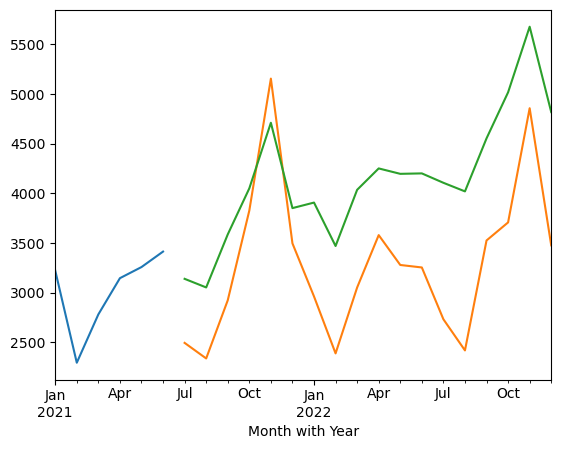

In [51]:
training['revenue']['2021-01-01':].plot()
testing['revenue'].plot()
prediction.plot()

In [52]:
mae=mean_absolute_error(testing,prediction)

In [53]:
mae

893.4229424353202

In [54]:
mae=mae*0.1

In [55]:
mae

89.34229424353202